In [0]:
import pandas as pd
import altair as alt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
path = os.path.join("drive", "My Drive", "MinneMUDAC2019", "Files")
data = pd.read_csv(os.path.join(path, "novice_cleaned_data.csv"))
march = pd.read_csv(os.path.join(path,"contracts_march_2020.csv"),skiprows = 3)
may = pd.read_csv(os.path.join(path,"contracts_may_2020.csv"),skiprows = 3)
july = pd.read_csv(os.path.join(path,"contracts_july_2020.csv"),skiprows = 3)

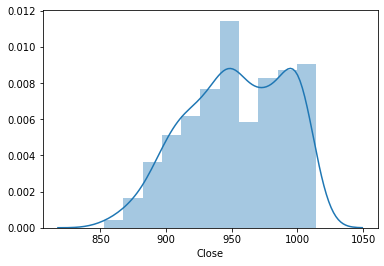

In [4]:
sns.distplot(march["Close"])

In [5]:
open_close_color = alt.condition("datum.Open < datum.Close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

rule = alt.Chart(march).mark_rule().encode(
    alt.X(
        'Date:T',
        # scale=alt.Scale(domain=[{"month": 5, "date": 31, "year": 2009},
        #                         {"month": 7, "date": 1, "year": 2009}]),
        #axis=alt.Axis(format='%y%m/%d', title='Date')
    ),
    alt.Y(
        'Low',
        title='Price',
        scale=alt.Scale(zero=False),
    ),
    alt.Y2('High'),
    color=open_close_color
)

bar = alt.Chart(march).mark_boxplot().encode(
    x='date:T',
    y='Open',
    y2='Close',
    color=open_close_color
)

bar+rule.interactive()

alt.LayerChart(...)

In [6]:
alt.Chart(march).mark_line().encode(
    x = "Date:T",
    y = "Close:Q"
)

alt.Chart(...)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
# you can use "-1" as a stand-in for one dimension when reshaping NumPy arrays,
# and NumPy will determine the correct value based on the other dimensions.
eod_prices = np.reshape(march["Close"].values, (-1, 1))
eod_prices = scaler.fit_transform(eod_prices)

eod_prices = np.reshape(eod_prices, -1)
eod_prices[-1]

0.2569659442724461

In [8]:
eod_prices.shape

(452,)

In [9]:
y = np.zeros((n_samples,5))
eod_prices[n_steps+1:n_steps+6]

NameError: ignored

In [0]:
n_steps = 20
n_samples = len(eod_prices) - n_steps

# split eod_prices into X (100 day windows) and y (next day prices)
X = np.zeros((n_samples-5, n_steps))
y = np.zeros((n_samples-5,5))

for i in range(n_samples - n_steps - 5):
  X[i] = eod_prices[i:i + n_steps]
  y[i] = eod_prices[i + n_steps: i+n_steps+5]



In [12]:
split_index = int(n_samples * 0.8)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((345, 20), (82, 20), (345, 5), (82, 5))

In [13]:
y_train[0]

array([0.85294118, 0.8126935 , 0.81424149, 0.78947368, 0.76625387])

RNN

In [14]:
from tensorflow import keras

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape

((345, 20, 1), (82, 20, 1))

In [0]:
n_units = 25
n_epochs = 50
batch_size = 50

In [0]:
rnn_model = keras.Sequential([
  keras.layers.SimpleRNN(n_units),
  keras.layers.Dense(1)
])

rnn_model.compile(
  loss='mean_absolute_error',
  optimizer='adam'
)

In [18]:
rnn_model.fit(
    X_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size
)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 345 samples
Epoch 1/50
345/345 [==============================] - 1s 3ms/sample - loss: 1.3293
Epoch 2/50
345/345 [==============================] - 0s 101us/sample - loss: 0.4543
Epoch 3/50
345/345 [==============================] - 0s 115us/sample - loss: 0.1704
Epoch 4/50
345/345 [==============================] - 0s 117us/sample - loss: 0.1588
Epoch 5/50
345/345 [==============================] - 0s 112us/sample - loss: 0.0976
Epoch 6/50
345/345 [==============================] - 0s 122us/sample - loss: 0.0882
Epoch 7/50
345/345 [==============================] - 0s 120us/sample - loss: 0.0813
Epoch 8/50
345/345 [==============================] - 0s 102us/sample - loss: 0.0729
Epoch 9/50
345/345 [==============================] - 0s 103us/sample - loss: 0.0700
Epoch 10/50
345/345 [==============================] - 0s 129us/sample - loss: 0.0682
Epoch 11/50
345/345 [============================

In [109]:
y_train[0]

array([0.85294118, 0.8126935 , 0.81424149, 0.78947368, 0.76625387])

In [102]:
scaler.inverse_transform([y_train])

ValueError: ignored

In [111]:
rnn_model.predict(X_train)

array([[0.84373426],
       [0.8411204 ],
       [0.820672  ],
       [0.81796914],
       [0.80163467],
       [0.78214824],
       [0.7708579 ],
       [0.7703856 ],
       [0.77202636],
       [0.8038718 ],
       [0.81732625],
       [0.8021561 ],
       [0.79041696],
       [0.81252396],
       [0.8324522 ],
       [0.83102334],
       [0.8265296 ],
       [0.8297182 ],
       [0.8268707 ],
       [0.79615927],
       [0.77035767],
       [0.80922437],
       [0.85280985],
       [0.8623544 ],
       [0.8727634 ],
       [0.8827265 ],
       [0.89829946],
       [0.9093152 ],
       [0.92085296],
       [0.9307817 ],
       [0.91995007],
       [0.91856176],
       [0.93523306],
       [0.9369827 ],
       [0.9142416 ],
       [0.880397  ],
       [0.8556583 ],
       [0.88601565],
       [0.8922364 ],
       [0.90238094],
       [0.8928283 ],
       [0.9108245 ],
       [0.9277036 ],
       [0.9197788 ],
       [0.9159853 ],
       [0.9244968 ],
       [0.9347328 ],
       [0.943

In [0]:
from sklearn.metrics import mean_absolute_error

def evaluate(model):
  predicted_train = model.predict(X_train)
  predicted_test = model.predict(X_test)

  # un-normalize predictions
  predicted_train = scaler.inverse_transform(predicted_train)
  predicted_test = scaler.inverse_transform(predicted_test)
  # get original data values
  y_train_raw = scaler.inverse_transform([y_train])[0]
  y_test_raw = scaler.inverse_transform([y_test])[0]
  # calculate mean squared error
  trainScore = mean_absolute_error(y_train_raw, predicted_train[:,:])
  print('Train Score: %.2f MAE' % (trainScore))
  testScore = mean_absolute_error(y_test_raw, predicted_test[:,:])
  print('Test Score: %.2f MAE' % (testScore))

In [81]:
X_test

array([[[0.55882353],
        [0.59133127],
        [0.58823529],
        ...,
        [0.36687307],
        [0.33126935],
        [0.2879257 ]],

       [[0.59133127],
        [0.58823529],
        [0.63157895],
        ...,
        [0.33126935],
        [0.2879257 ],
        [0.25386997]],

       [[0.58823529],
        [0.63157895],
        [0.59597523],
        ...,
        [0.2879257 ],
        [0.25386997],
        [0.24458204]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [82]:
evaluate(rnn_model)

ValueError: ignored

In [0]:
gru_model = keras.Sequential([
  keras.layers.GRU(n_units), # here's the only change we have to make
  keras.layers.Dense(1)
])

In [20]:
gru_model.compile(
  loss='mean_absolute_error',
  optimizer='adam'
)

gru_model.fit(
    X_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size
)

evaluate(gru_model)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 345 samples
Epoch 1/50
345/345 [==============================] - 1s 2ms/sample - loss: 0.5530
Epoch 2/50
345/345 [==============================] - 0s 322us/sample - loss: 0.3795
Epoch 3/50
345/345 [==============================] - 0s 310us/sample - loss: 0.1895
Epoch 4/50
345/345 [==============================] - 0s 295us/sample - loss: 0.0998
Epoch 5/50
345/345 [==============================] - 0s 308us/sample - loss: 0.0965
Epoch 6/50
345/345 [==============================] - 0s 308us/sample - loss: 0.0828
Epoch 7/50
345/345 [==============================] - 0s 299us/sample - loss: 0.0801
Epoch 8/50
345/345 [==============================] - 0s 302us/sample - loss: 0.0747
Epoch 9/50
345/345 [==============================] - 0s 307us/sample - loss: 0.0735
Epoch 10/50
345/345 [==============================] - 0s 326us/sample - loss: 0.0727
Epoch 11/50
345/345 [===============

NameError: ignored

In [0]:
lstm_model = keras.Sequential([
keras.layers.LSTM(n_units,return_sequences =True), # the magic change
  keras.layers.Dense(1)
])

In [27]:
lstm_model.compile(
  loss='mean_absolute_error',
  optimizer='adam'
)

lstm_model.fit(
    X_train,
    y_train,
    epochs=n_epochs,
    batch_size=batch_size
)

evaluate(lstm_model)

Train on 345 samples
Epoch 1/50


InvalidArgumentError: ignored

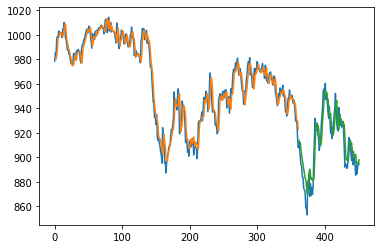

In [0]:
# Visualize LSTM predictions
import matplotlib.pyplot as plt

predicted_train = lstm_model.predict(X_train)
predicted_test = lstm_model.predict(X_test)

# un-normalize predictions
predicted_train = scaler.inverse_transform(predicted_train)
predicted_test = scaler.inverse_transform(predicted_test)

plt.plot(range(len(eod_prices)), scaler.inverse_transform([eod_prices])[0])
plt.plot(range(n_steps, len(predicted_train) + n_steps), predicted_train)
plt.plot(range(len(predicted_train) + n_steps, len(eod_prices)), predicted_test)
plt.show()